# CS550 Machine Learning  

## Assignment 01

### Name - Nitin Mane 
### ID - M24MT004

### College - Indian Institute of Technology, Bhilai

### Question 2 

#### Step 1: Plot the Observations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# Define the dataset
data = np.array([[1, 4], [1, 3], [0, 4], [5, 1], [6, 2], [4, 0]])
# Plotting the data points
plt.scatter(data[:, 0], data[:, 1], c='black')
plt.title('Initial Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('./images/initial_observations.jpg')  # Save the figure as a JPG file
plt.show()

#### Step 2: Intialize Cluster

In [ ]:
# Random initial cluster assignments
cluster_labels = np.random.choice([0, 1], size=6)
print("Initial Cluster Labels:", cluster_labels)

#### Step 3: Compute Centroid

In [ ]:
# Function to compute the centroid of each cluster
def compute_centroid(cluster_points):
    return np.mean(cluster_points, axis=0)

# Compute centroids for the initial clusters
centroids = np.array([compute_centroid(data[cluster_labels == k]) for k in range(2)])
print("Initial Centroids:\n", centroids)

#### Step 4: Ressasign point to new cluster labels

In [ ]:
# Reassign points to the nearest centroid
new_cluster_labels = np.array([np.argmin([np.linalg.norm(point - centroids[k]) for k in range(2)]) for point in data])
print("New Cluster Labels:", new_cluster_labels)

#### Step 5: Iterative K-means to final clusters

In [ ]:
# Iterative K-means steps until convergence
for iteration in range(10):  # Limit iterations to avoid infinite loops
    centroids = np.array([compute_centroid(data[cluster_labels == k]) for k in range(2)])
    new_cluster_labels = np.array([np.argmin([np.linalg.norm(point - centroids[k]) for k in range(2)]) for point in data])
    
    if np.array_equal(new_cluster_labels, cluster_labels):
        break  # Convergence reached
    
    cluster_labels = new_cluster_labels

# Final cluster labels and centroids after convergence
print("Final Cluster Labels:", cluster_labels)
print("Final Centroids:\n", centroids)

#### Step 1: Plot the Final Cluster

In [ ]:
# Plot final clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('Final Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('./images/final_clusters.jpg')  # Save the final clusters as a JPG file
plt.show()

### Question 3 

#### Step 1: Intialize the dataset

In [20]:
import numpy as np

# Define the dataset
X1 = np.array([[4, 1], [2, 4], [2, 3], [3, 6], [4, 4]])
X2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]])

# Compute the means of each class
mean_X1 = np.mean(X1, axis=0)
mean_X2 = np.mean(X2, axis=0)

print("Mean of X1:", mean_X1)
print("Mean of X2:", mean_X2)

Mean of X1: [3.  3.6]
Mean of X2: [8.4 7.6]


#### Step 2: Computer the class scatter matrix

In [22]:
# Compute the within-class scatter matrix
S_W = np.zeros((2, 2))
for x in X1:
    S_W += np.dot((x - mean_X1).reshape(2, 1), (x - mean_X1).reshape(1, 2))
for x in X2:
    S_W += np.dot((x - mean_X2).reshape(2, 1), (x - mean_X2).reshape(1, 2))

# Compute the between-class scatter matrix
mean_overall = np.mean(np.vstack((X1, X2)), axis=0)
S_B = np.dot((mean_X1 - mean_overall).reshape(2, 1), (mean_X1 - mean_overall).reshape(1, 2)) * X1.shape[0] + \
      np.dot((mean_X2 - mean_overall).reshape(2, 1), (mean_X2 - mean_overall).reshape(1, 2)) * X2.shape[0]

print("Within-class Scatter Matrix SW:\n", S_W)
print("Between-class Scatter Matrix SB:\n", S_B)

Within-class Scatter Matrix SW:
 [[13.2 -2.2]
 [-2.2 26.4]]
Between-class Scatter Matrix SB:
 [[72.9 54. ]
 [54.  40. ]]


#### Step 3: Compute the eigen values and matrix with largest values

In [24]:
# Solve the eigenvalue problem for the matrix SW^-1 * SB
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Select the eigenvector with the largest eigenvalue
w = eig_vecs[:, np.argmax(eig_vals)]

print("Linear Discriminant Vector w:", w)

Linear Discriminant Vector w: [0.91955932 0.39295122]


#### Step 4: Project the dot matrix outcome

In [26]:
# Project the data onto the linear discriminant
X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

print("Projected Data X1:", X1_proj)
print("Projected Data X2:", X2_proj)

Projected Data X1: [4.07118849 3.41092352 3.0179723  5.11638527 5.25004215]
Projected Data X2: [12.20554606  8.66096567 10.24078996 10.10713308 12.33920294]


### Question 04

#### Step 1: load the dataset from csv file

In [40]:
# Wine Quality Data Set Analysis and Scaling

# Step 1: Load the Wine Dataset
import pandas as pd

# Load the dataset from the CSV file
wine_data = pd.read_csv('./dataset/WineQT.csv')

# Display the first few rows of the dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

#### Step 2: Convert the Quality Attribute

In [42]:
# Convert quality attribute
wine_data['quality'] = wine_data['quality'].apply(lambda x: 0 if x <= 6 else 1)

# Display the first few rows after conversion
print(wine_data[['quality']].head())

   quality
0        0
1        0
2        0
3        0
4        0


#### Step 3: Normalize the Attributes using Min-Max Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all features except for 'quality'
scaled_features = scaler.fit_transform(wine_data.drop(columns=['quality']))

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Add the 'quality' column back to the scaled DataFrame
df_scaled['quality'] = wine_data['quality']

# Display the first few rows of the scaled dataset
print(df_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846        0  
1  0.21538

#### Step 4: Plot the Data Before and After Scaling

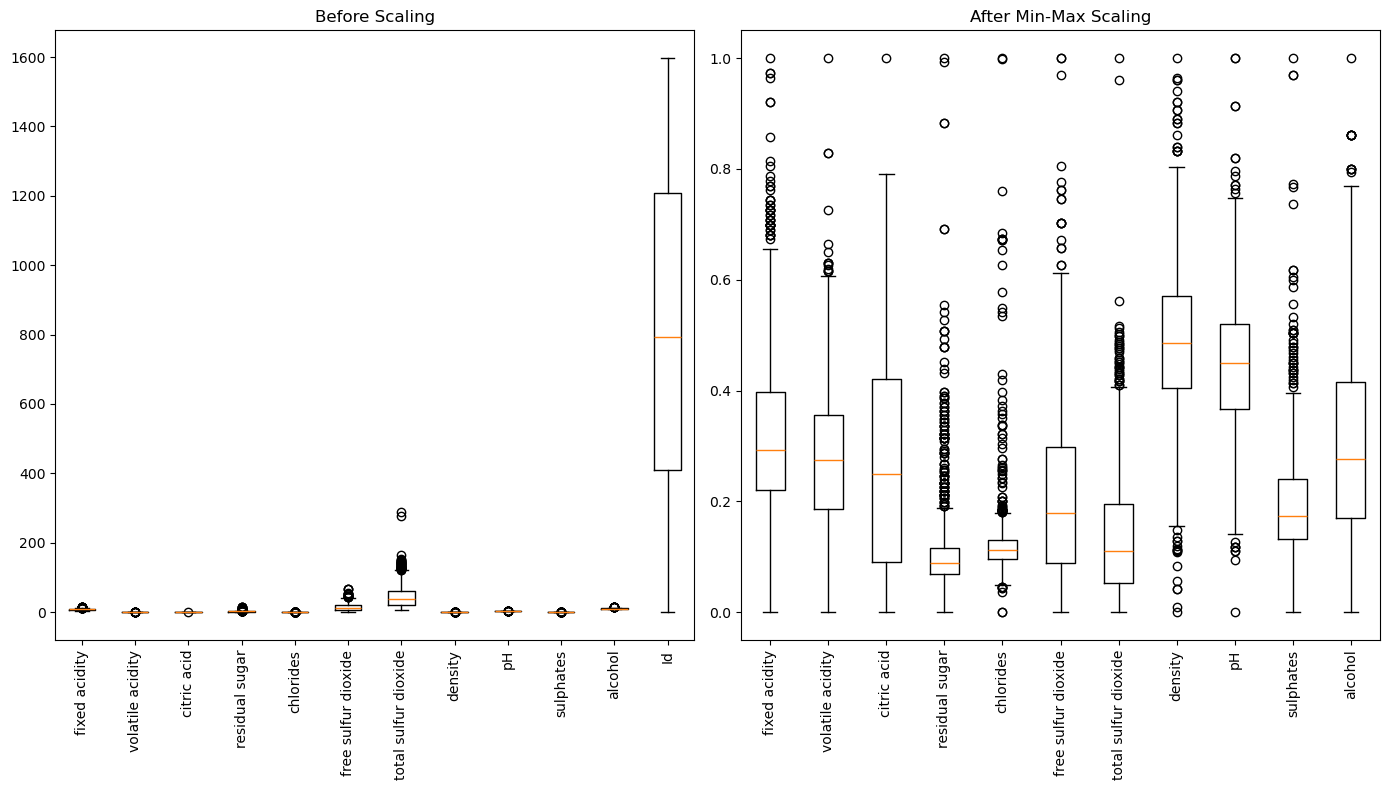

In [48]:
import matplotlib.pyplot as plt

# Plotting before scaling
plt.figure(figsize=(14, 8))

# Plotting the data before scaling
plt.subplot(1, 2, 1)
plt.boxplot(wine_data.drop(columns=['quality']).values)
plt.title('Before Scaling')
plt.xticks(range(1, len(wine_data.columns)), wine_data.columns.drop('quality'), rotation=90)

# Plotting after scaling
plt.subplot(1, 2, 2)
plt.boxplot(df_scaled.drop(columns=['quality']).values)
plt.title('After Min-Max Scaling')
plt.xticks(range(1, len(df_scaled.columns)), df_scaled.columns.drop('quality'), rotation=90)
plt.savefig('./images/scaling_comparison_plot.jpg')  # Save the final clusters as a JPG file
plt.tight_layout()
plt.show()